In [1]:
using Pkg
Pkg.add("DifferentialEquations")
using DifferentialEquations

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
 Installed Adapt ─────────────────────── v1.0.0
 Installed RecursiveFactorization ────── v0.1.0
 Installed DiffEqFinancial ───────────── v2.1.0
 Installed Inflate ───────────────────── v0.1.1
 Installed ArnoldiMethod ─────────────── v0.0.4
 Installed IterativeSolvers ──────────── v0.8.1
 Installed DifferentialEquations ─────── v6.6.0
 Installed MatrixFactorizations ──────── v0.1.0
 Installed TableTraits ───────────────── v1.0.0
 Installed DocStringExtensions ───────── v0.8.0
 Installed RecursiveArrayTools ───────── v1.0.2
 Installed DelayDiffEq ───────────────── v5.13.0
 Installed OrdinaryDiffEq ────────────── v5.14.0
 Installed BlockArrays ───────────────── v0.9.1
 Installed LightGraphs ───────────────── v1.2.0
 Installed PoissonRandom ─────────────── v0.4.0
 Installed 

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1186


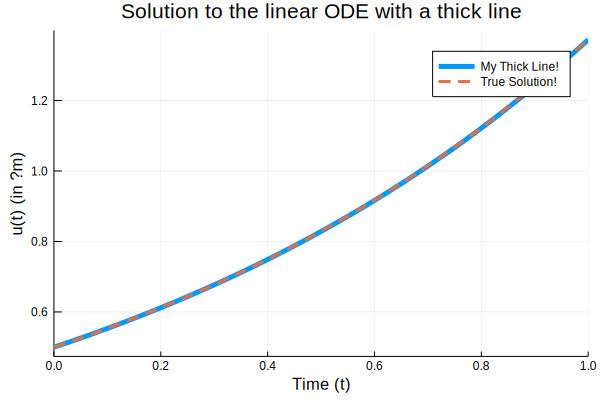

In [2]:
f(u,p,t) = 1.01*u
u0=1/2
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)
sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)
using Plots
plot(sol,linewidth=5,title="Solution to the linear ODE with a thick line",
     xaxis="Time (t)",yaxis="u(t) (in μm)",label="My Thick Line!") # legend=false
plot!(sol.t, t->0.5*exp(1.01t),lw=3,ls=:dash,label="True Solution!")

In [3]:
function lorenz(du,u,p,t)
 du[1] = 10.0*(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end

lorenz (generic function with 1 method)

In [4]:
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz,u0,tspan)
sol = solve(prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 1287-element Array{Float64,1}:
   0.0                  
   3.5678604836301404e-5
   0.0003924646531993154
   0.0032624016752212923
   0.00905808176456279  
   0.0169564955927642   
   0.02769000245764448  
   0.04185634375662893  
   0.06024025665362463  
   0.0836852441654334   
   0.11336451506889586  
   0.14862131186030308  
   0.18703929175446188  
   ⋮                    
  99.17448947475748     
  99.25177886977121     
  99.3340481055892      
  99.40002509604705     
  99.47321520444633     
  99.54429913558833     
  99.6304176475736      
  99.73556893651245     
  99.81512588011671     
  99.88533419341042     
  99.94751447208056     
 100.0                  
u: 1287-element Array{Array{Float64,1},1}:
 [1.0, 0.0, 0.0]                    
 [0.999643, 0.000998805, 1.78143e-8]
 [0.996105, 0.0109654, 2.14696e-6]  
 [0.969359, 0.0897704, 0.000143801] 
 [0.924204, 0.242289, 0.00104616]   
 [0.880045, 0.43

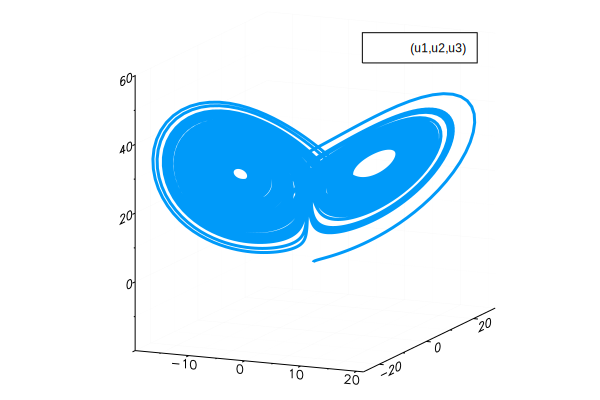

In [5]:
plot(sol,vars=(1,2,3))